In [1]:
! ls -al data/.raw/GFS_data

total 416208
drwxr-xr-x 2 slimbook slimbook 212992 ago  1 16:41 .
drwxr-xr-x 3 slimbook slimbook   4096 ago  4 15:15 ..
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010100_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010106_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010112_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010118_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010200_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010206_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010212_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010218_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010300_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010306_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_2015010312_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 ago  1 16:20 GFS_

-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121712_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121718_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121800_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121806_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121812_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121818_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121900_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121906_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121912_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016121918_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016122000_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016122006_f006.gra
-rw-r--r-- 1 slimbook slimbook  94536 jul 31 11:08 GFS_2016122012_f006.gra
-rw-r--r-- 1 slimbook sli

In [2]:
from os import listdir
import numpy as np
import folium
import matplotlib.pyplot as plt

base_dir = 'data/.raw/GFS_data'

content = []
filenames = []
for file in listdir(base_dir):
    file_path = f'{base_dir}/{file}'
    #array = np.fromfile(file_path +"/"+ file, dtype=np.float32)
    filenames.append(file)
    content.append(np.fromfile(file_path, dtype=np.float32)[21762:21879])
    
print(content[0])
print(filenames[0])
print(len(content[0]))
print(len(listdir(base_dir)))

[5.65383    4.1774874  5.518496   5.0348883  4.0402226  4.305276
 5.159118   5.783321   6.29263    5.920008   5.2546077  4.3602753
 3.80958    4.0512342  3.570224   5.9944644  4.7828965  4.3901024
 4.05021    4.763297   5.6126018  5.7884884  5.4167333  6.970351
 6.8723283  4.5906425  2.6394887  3.2539976  4.9595566  4.6292977
 3.5873806  3.5749824  6.168468   6.554464   7.3625674  6.25
 6.484944   6.9186196  5.67       2.3977697  2.3124878  4.814239
 3.138184   3.6416616  3.4891403  3.184415   3.0800648  3.6657603
 4.677403   7.2479305  5.489308   5.07347    0.42999998 3.0056112
 5.371126   4.4653444  5.2941666  4.7535353  2.9939272  2.6160274
 1.5388308  3.2964528  5.8286533  6.2514157  3.1663542  1.8179383
 2.9080062  2.2487552  4.872309   3.282834   4.4753213  5.2918143
 3.9636471  3.3104076  4.3675733  4.7530303  1.4462711  4.1
 4.3510914  2.4374166  3.1461086  3.0870697  0.84023803 4.5985756
 5.4588094  5.7118998  5.9035583  6.498992   6.162629   4.661695
 3.9609342  3.5141144  2.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import json
    
def get_date(base_dir):    
    new_time = []    
    for file in listdir(base_dir):
        file_path = f'{base_dir}/{file}'
        match=file.split("_")[1]
        date = pd.to_datetime(match, format = "%Y%m%d%H").strftime('%d/%m/%Y')
        time = (datetime.strptime(match, "%Y%m%d%H") + timedelta(hours=6)).strftime('%H:%M')
        new_time.append(date + " " + time) 
    return new_time
    
        #for i in range(len(main_dic.keys())):
    #dict_final.update({datetime_key:content})
    # VEL -- [21762:21879]

def get_vvel(base_dir):
    """TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
        EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE
        SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
        TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
    """
    content = []
    filenames = []
    filenames.append(get_date(base_dir))
    for file in listdir(base_dir):
        file_path = f'{base_dir}/{file}'
        filenames.append(file)
        content.append(np.fromfile(file_path, dtype=np.float32)[21762:21879])
    
    return pd.DataFrame(data=content)

In [4]:
df_data = get_vvel(base_dir)
dates = get_date(base_dir)
dates

['11/05/2016 00:00',
 '20/07/2016 06:00',
 '05/09/2016 00:00',
 '22/07/2017 06:00',
 '28/10/2016 00:00',
 '22/12/2017 06:00',
 '27/09/2015 18:00',
 '06/03/2017 00:00',
 '08/07/2016 00:00',
 '13/01/2016 18:00',
 '19/11/2015 12:00',
 '20/10/2015 06:00',
 '06/04/2016 12:00',
 '27/10/2015 00:00',
 '02/05/2017 18:00',
 '12/01/2017 06:00',
 '06/09/2015 06:00',
 '06/10/2016 06:00',
 '06/07/2017 12:00',
 '10/02/2015 06:00',
 '14/06/2015 12:00',
 '20/07/2017 00:00',
 '19/02/2017 06:00',
 '02/01/2015 12:00',
 '30/11/2017 06:00',
 '24/09/2017 18:00',
 '16/05/2015 18:00',
 '10/11/2017 06:00',
 '20/01/2016 12:00',
 '01/12/2017 12:00',
 '19/12/2016 18:00',
 '29/05/2016 00:00',
 '25/02/2016 06:00',
 '23/07/2016 00:00',
 '23/05/2015 00:00',
 '27/11/2016 18:00',
 '08/02/2017 12:00',
 '02/12/2017 12:00',
 '05/07/2016 12:00',
 '17/10/2016 00:00',
 '05/01/2015 06:00',
 '22/01/2015 00:00',
 '07/12/2015 12:00',
 '04/09/2015 18:00',
 '15/05/2015 06:00',
 '10/04/2015 00:00',
 '13/05/2017 18:00',
 '30/09/2015 

In [5]:
df_data.index = dates

In [6]:
type(df_data)


pandas.core.frame.DataFrame

In [7]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
11/05/2016 00:00,5.653830,4.177487,5.518496,5.034888,4.040223,4.305276,5.159118,5.783321,6.292630,5.920008,...,2.382478,3.592019,3.855489,5.973826,8.433136,7.333110,7.362961,6.166441,6.465856,6.046486
20/07/2016 06:00,2.214159,1.311869,1.379275,2.623604,5.246503,4.241250,5.590537,5.754172,6.938385,8.547075,...,0.736817,2.714590,4.250800,3.181148,3.100580,3.382809,4.413898,3.585108,3.375219,2.440184
05/09/2016 00:00,2.662931,2.410145,4.261373,2.729579,3.390059,3.389985,3.530694,4.711794,4.941012,5.287873,...,2.170368,3.283063,3.273316,3.430350,5.649106,6.356493,6.693377,6.620695,6.778864,5.580439
22/07/2017 06:00,1.044518,1.613396,0.648468,3.547940,5.320402,4.342616,6.755115,6.115415,6.982269,7.534724,...,1.300861,2.609308,4.307425,2.922413,1.318438,2.382268,0.550122,1.384689,1.034980,0.626427
28/10/2016 00:00,2.471113,2.277477,5.199250,3.542654,3.016836,4.950656,2.965215,2.474065,3.449420,2.350766,...,2.296127,3.357931,1.885577,0.736003,1.902761,2.266385,2.232779,2.773662,3.730965,3.009867
22/12/2017 06:00,0.814671,2.027451,1.315798,6.306668,5.730626,4.658613,5.709183,4.938642,3.598244,2.608238,...,0.623261,3.610217,3.732612,1.766896,2.098315,2.429782,2.302350,3.415247,3.106778,1.814702
27/09/2015 18:00,3.551056,1.969772,2.121320,2.831960,3.106445,2.100000,3.220248,2.844292,3.014963,1.392839,...,1.252996,0.565685,1.081665,1.029563,2.846050,2.080865,1.166190,1.746425,1.941649,1.303841
06/03/2017 00:00,8.570298,7.833900,11.527793,11.808895,8.105554,11.054863,10.412013,12.133426,11.229426,10.746627,...,2.817801,3.361547,3.448188,2.561250,2.475884,2.968164,3.101613,3.939543,5.889822,4.967897
08/07/2016 00:00,1.834148,0.662872,1.507481,3.372002,3.202577,4.426658,5.820524,7.089175,7.235226,6.587519,...,2.252820,1.967257,2.276840,3.472881,6.224146,7.302821,5.406736,4.401136,3.588119,1.738994
13/01/2016 18:00,9.077555,4.954039,8.919641,11.790610,7.761714,7.300904,9.577233,8.518427,10.745255,5.002799,...,1.880984,2.137007,0.822010,0.976217,3.220342,3.523081,2.858548,2.971060,3.544249,2.746507


In [8]:
csv_path = ("/home/slimbook/git-repos/eolo-project/data/processed/power_data.csv")

def setting_X(df):
    meteo_df = df
    meteo_df.reset_index(level=0, inplace=True)
    meteo_df["date"]=pd.to_datetime(meteo_df['index'], format='%d/%m/%Y %H:%M')
    meteo_df=meteo_df.sort_values(by='date',ascending=True)
    meteo_df=meteo_df.set_index("date").sort_index().loc[:'31/12/2016 00:00']
    meteo_df=meteo_df[[x for x in meteo_df.columns if x != 'index']]

    return meteo_df


def setting_y(csv_file):
    power_df = pd.read_csv(csv_file)
    power_df['date'] = pd.to_datetime(power_df['date'], format='%d/%m/%Y %H:%M')
    power_df = power_df.sort_values(by='date',ascending=True)
    power_df=power_df.set_index("date").sort_index().loc[:'31/12/2016 00:00']

    return power_df

In [9]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
11/05/2016 00:00,5.653830,4.177487,5.518496,5.034888,4.040223,4.305276,5.159118,5.783321,6.292630,5.920008,...,2.382478,3.592019,3.855489,5.973826,8.433136,7.333110,7.362961,6.166441,6.465856,6.046486
20/07/2016 06:00,2.214159,1.311869,1.379275,2.623604,5.246503,4.241250,5.590537,5.754172,6.938385,8.547075,...,0.736817,2.714590,4.250800,3.181148,3.100580,3.382809,4.413898,3.585108,3.375219,2.440184
05/09/2016 00:00,2.662931,2.410145,4.261373,2.729579,3.390059,3.389985,3.530694,4.711794,4.941012,5.287873,...,2.170368,3.283063,3.273316,3.430350,5.649106,6.356493,6.693377,6.620695,6.778864,5.580439
22/07/2017 06:00,1.044518,1.613396,0.648468,3.547940,5.320402,4.342616,6.755115,6.115415,6.982269,7.534724,...,1.300861,2.609308,4.307425,2.922413,1.318438,2.382268,0.550122,1.384689,1.034980,0.626427
28/10/2016 00:00,2.471113,2.277477,5.199250,3.542654,3.016836,4.950656,2.965215,2.474065,3.449420,2.350766,...,2.296127,3.357931,1.885577,0.736003,1.902761,2.266385,2.232779,2.773662,3.730965,3.009867


In [10]:
meteo = df_data

In [11]:
meteo.reset_index(level=0, inplace=True)
meteo["date"]=pd.to_datetime(meteo['index'], format='%d/%m/%Y %H:%M')
meteo=meteo.sort_values(by='date',ascending=True)
meteo=meteo.set_index("date").sort_index().loc[:'31/12/2016 00:00']
meteo=meteo[[x for x in meteo.columns if x != 'index']]

In [12]:
power = setting_y(csv_path)

train = pd.concat([power, meteo], axis=1, join="inner")
train.sort_index(ascending=True, inplace=True)

X = train[[x for x in train.columns if x != 'Production']]
y = pd.DataFrame(train["Production"])

In [13]:
from sklearn.model_selection import train_test_split
from src.functions import loading, get_var, setting_X, setting_y

from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2280, 117)
(2280, 1)
(571, 117)
(571, 1)


In [14]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train.values, y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
model.predict(X_test)

array([ 97724.937,   7923.234,  96164.795,   2584.877,  49464.725,
       158921.949, 140871.598,  68271.759,  46249.616,  70435.729,
        10373.079,  30525.482, 124538.052,  24546.125,  42183.466,
         3908.488,   2586.332,  84647.681, 104673.794,  84120.556,
        34626.039,   4081.137,  65891.008,  61428.502,  72547.797,
        63494.688,  16981.328,    534.345,   4403.793,  38698.936,
        94260.787,  32814.184,   8887.826, 171575.598,   7800.512,
        60588.473,  44673.354, 120392.082,  27443.748,  10442.452,
        82435.241,  95817.535,  79843.382,  84523.769,  95286.034,
         9076.912,  44737.043,  15313.214,  59719.171,  32756.07 ,
       124557.439,   8832.51 ,  14592.702, 109374.662,  21973.517,
         1869.647,  98597.119,  27686.319,  15860.161,  93871.373,
        13017.339,  84457.779, 147072.222,  96627.984,  35175.011,
        68734.951,  46134.586,  60400.726,   9121.302,  17232.261,
        42831.339,  56999.835,   8419.759,  47589.147,  36602.

In [16]:
feten = model.feature_importances_

In [17]:
len(feten)

117

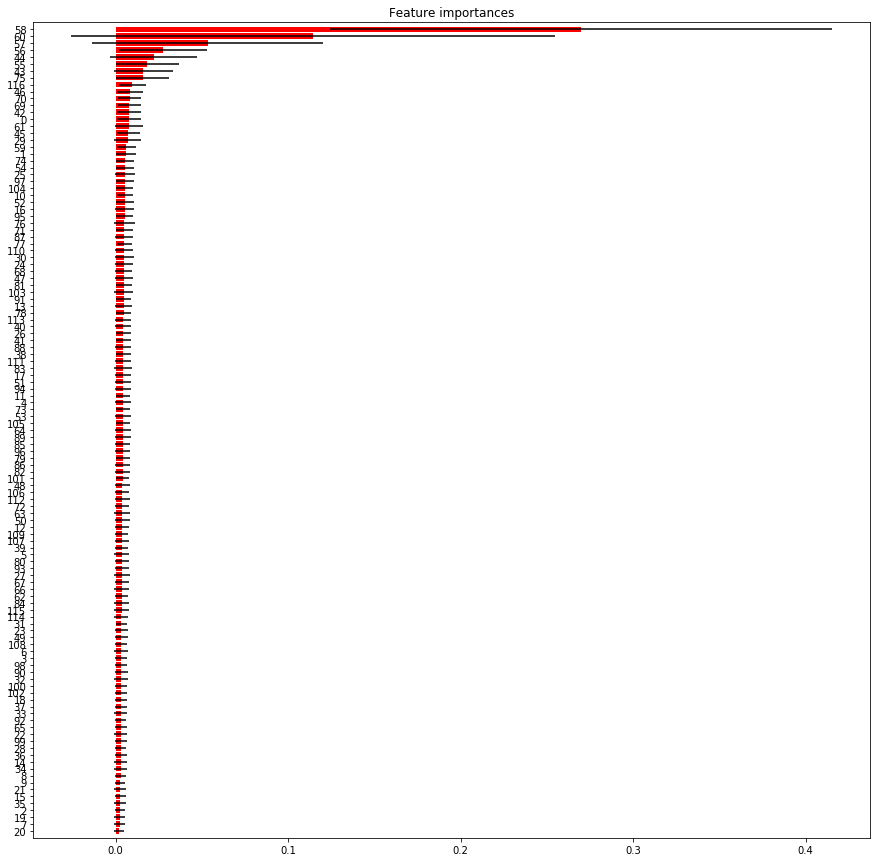

In [18]:
def plotting_feature_importance(importance):
    """Plot the feature importances of the forest"""
    std = np.std([modelo.feature_importances_ for modelo in model.estimators_],
                 axis=0)
    index = np.argsort(feten)
    plt.figure(figsize=(15, 15))
    plt.title("Feature importances")
    plt.barh(range(X_train.values.shape[1]), feten[index],
           color="r", xerr=std[index], align="center")

    plt.yticks(range(X_train.values.shape[1]), index)
    plt.ylim([-1, X_train.values.shape[1]])
    plt.show()
plotting_feature_importance(feten)

In [19]:
x.max()

NameError: name 'x' is not defined

In [ ]:
top_40 = feten.argsort()[-40:][::-1]
top_40

In [ ]:
lon_res = 13
lat_res = 9
nz = 26

lat_step = 0.5
lon_step = 0.5

lat_start = 44
lat_end = lat_start + lat_step  * (lat_res - 1) # calculas lat final
lon_start = -123
lon_end = lon_start + lon_step * (lon_res -1)  # calculas lon final - con esto puedes construir mesh

points = top_40

In [ ]:
lat = np.linspace(start=lat_start, stop=lat_end, endpoint=lat_end, num=lat_res)
lon = np.linspace(start=lon_start, stop=lon_end, endpoint=lon_end, num=lon_res) # 
lon, lat = np.meshgrid(lon, lat)
Z = feten.reshape(lat_res, lon_res)
fig = plt.figure(figsize=(12, 10))
im = plt.pcolormesh(lat, lon, Z) # Asignas valores a su posición en el mapa
plt.colorbar(mappable=im)
 

In [ ]:
x = np.meshgrid(lon, lat)
len(x), len(x[0])

In [ ]:
len(Z), len(Z[0])

In [ ]:
Z.argmax()

In [ ]:
Z

In [ ]:
positions = np.vstack([lat.ravel(),lon.ravel()])
ptos = np.hstack((lat.reshape((lat.size,1)), lon.reshape((lon.size,1))))

In [ ]:
the_point = ptos[58]
the_point = list(the_point)
the_point

In [ ]:
def points(lat, lon): #insert values as (df[col_lat], df[col_lon])
    statmad = (lon, lat)
    statmadlist = statmad
    popup = the_point
    statmap = folium.Map(zoom_start=20) 
    return statmap    

#points(lon, lat)

#m = folium.Map(location=[(lat_start + lat_end) / 2, (lon_start + lon_end) / 2, ]).Marker(location=[45.18163, -120.15285],popup="Location").add_to(m)
    #folium.Marker(location=the_point,popup="Expected location"),
    #folium.Marker(location=[45.18163, -120.15285],popup="Real location")   
    
#map.add_child(zoom_start=7.25,
 #   tiles='Stamen Terrain')

def drawing_map(result_point, radio=False, distance=False):
    m = folium.Map(
        location=[(lat_start + lat_end) / 2, (lon_start + lon_end) / 2, ],
        zoom_start=7,
        tiles='Stamen Terrain'
    )

    tooltip = 'I am here!'
    if radio == True | distance == True:
        folium.CircleMarker(location = [45.58163, -120.15285], radius = 100, popup = ' FRI ').add_to(m) 
        folium.PolyLine(locations = [(result_point), (45.18163, -120.15285)], line_opacity = 0.5).add_to(m) 
        folium.Marker([45.18163, -120.15285], popup='<b>Condon WindFarm</b>', tooltip=tooltip).add_to(m)
    folium.Marker(result_point, popup='<i>Result</i>', tooltip=tooltip).add_to(m)
    
    return m

In [ ]:
drawing_map(the_point)